In [81]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

In [82]:
df=pd.read_csv('spam.csv',encoding="windows-1252")

In [83]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [84]:
df.shape

(5572, 5)

In [85]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [86]:
df=df.iloc[:,:2]

In [87]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [88]:
df.rename(columns={"v1":"target","v2":"text"}, inplace=True)
df.sample(3)

C:\Users\SUNNY RAJ\AppData\Local\Temp\ipykernel_11424\366853424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"v1":"target","v2":"text"}, inplace=True)


,target,text
2909,ham,How do you guys go to see movies on your side.
3237,ham,Good. No swimsuit allowed :)
3240,ham,Ok i've sent u da latest version of da project.


In [89]:
df.isnull().sum()
df.describe()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

C:\Users\SUNNY RAJ\AppData\Local\Temp\ipykernel_11424\3318910988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [90]:
df.describe()

,target,text
count,5169,5169
unique,2,5169
top,ham,Rofl. Its true to its name
freq,4516,1


In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["target"]=le.fit_transform(df["target"])

C:\Users\SUNNY RAJ\AppData\Local\Temp\ipykernel_11424\4225924073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"]=le.fit_transform(df["target"])


In [92]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


**EDA**

In [93]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

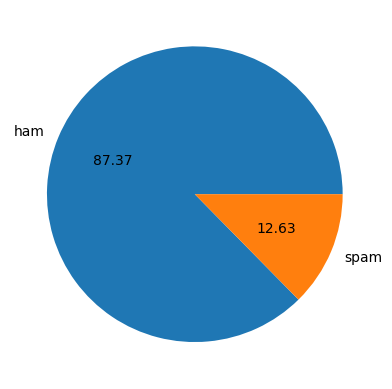

In [94]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [95]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\SUNNY
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
df["num_chars"]=df["text"].apply(len)
df.head()

C:\Users\SUNNY RAJ\AppData\Local\Temp\ipykernel_11424\3945250211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_chars"]=df["text"].apply(len)


,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [97]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\SUNNY
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [98]:
df["num_words"]=df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\SUNNY RAJ\AppData\Local\Temp\ipykernel_11424\2593671569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df["text"].apply(lambda x: len(nltk.word_tokenize(x)))


In [99]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [100]:
df["num_sent"]=df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\SUNNY RAJ\AppData\Local\Temp\ipykernel_11424\1786386681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sent"]=df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))


In [101]:
df.describe()

,target,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [102]:
df[df["target"]==0].describe()

,target,num_chars,num_words,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [103]:
df[df["target"]==1].describe()

,target,num_chars,num_words,num_sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


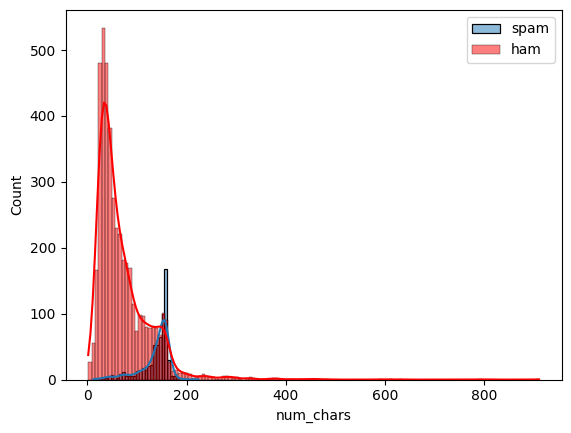

In [104]:
sns.histplot(df[df["target"]==1]['num_chars'],kde=True, label="spam")
sns.histplot(df[df["target"]==0]['num_chars'],kde=True, color="red", label="ham")
plt.legend()
plt.show()

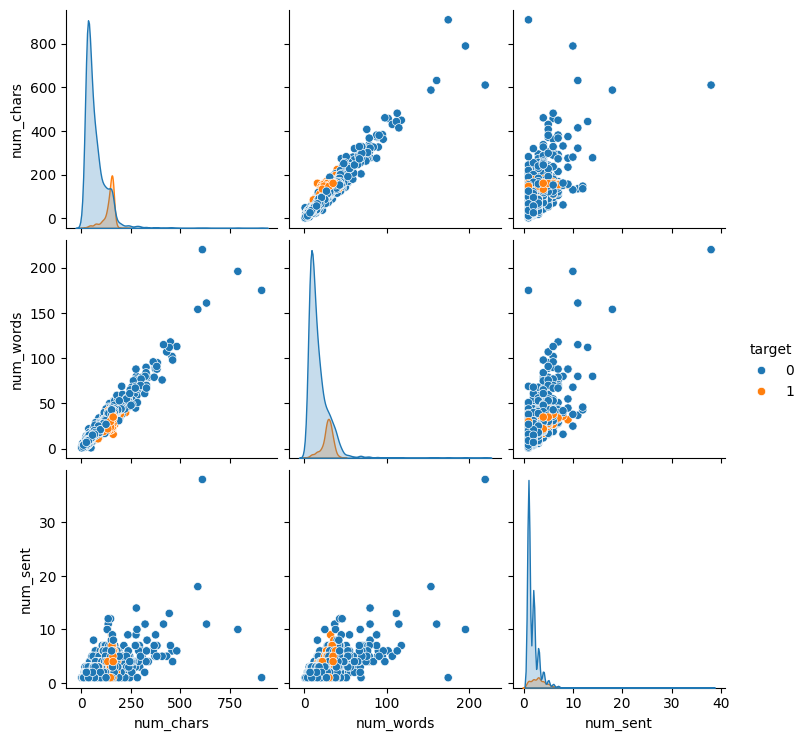

In [105]:
sns.pairplot(df, hue="target")

In [106]:
df_corr=df[["target","num_chars","num_words","num_sent"]].corr(method="pearson")

<Axes: >

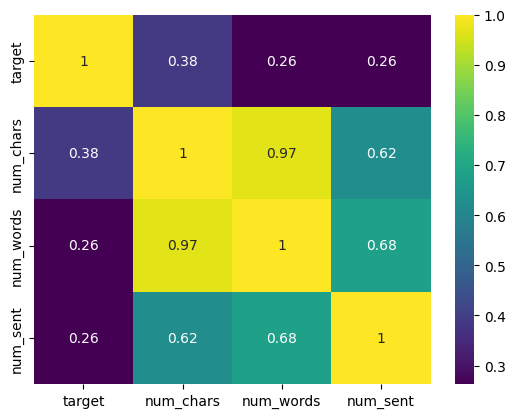

In [107]:
sns.heatmap(df_corr,cmap="viridis" ,annot=True)

##data preprocessing##
.lower case
.tokenization
.removing the special characters
.removing stop words and punctuations
.stemming

In [108]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for  i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [109]:
from nltk.corpus import stopwords
#stopwords.words("english")
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [110]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\SUNNY
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
df["transformed_text"]=df["text"].apply(transform_text)

C:\Users\SUNNY RAJ\AppData\Local\Temp\ipykernel_11424\958737439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["text"].apply(transform_text)


In [112]:
df.head()

,target,text,num_chars,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [113]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color="white")

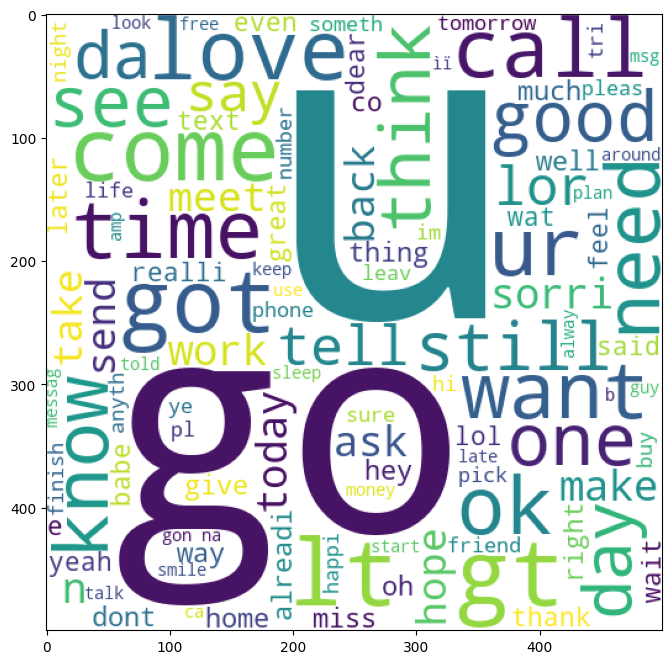

In [114]:
ham_wc=wc.generate(df[df["target"]==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

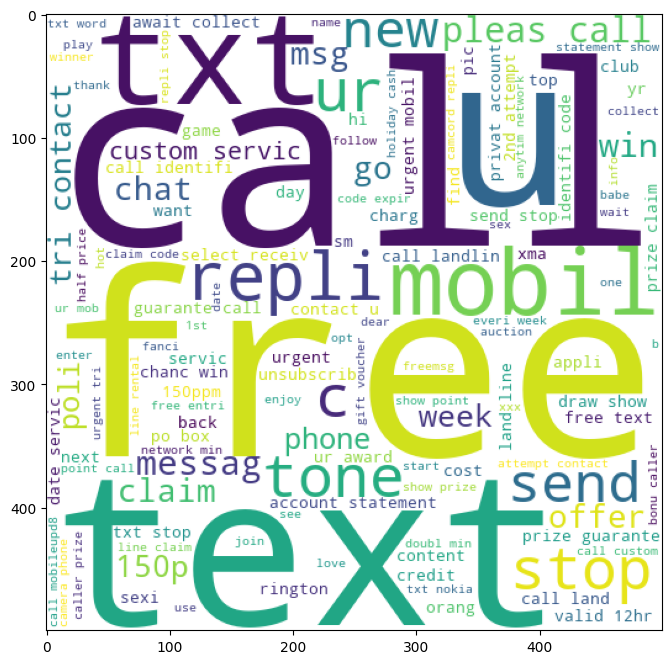

In [115]:
spam_wc=wc.generate(df[df["target"]==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

In [116]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [117]:
# spam_corpus

In [118]:
from collections import Counter
# Counter(spam_corpus).most_common(30)


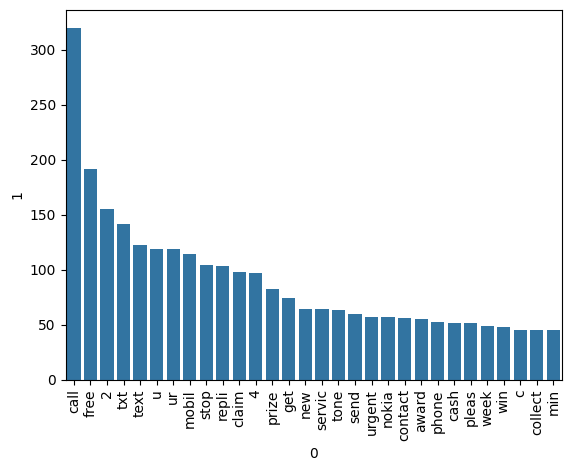

In [119]:

sns.barplot(x=0, y=1, data=pd.DataFrame(Counter(spam_corpus).most_common(30)))
plt.xticks(rotation="vertical")
plt.show()

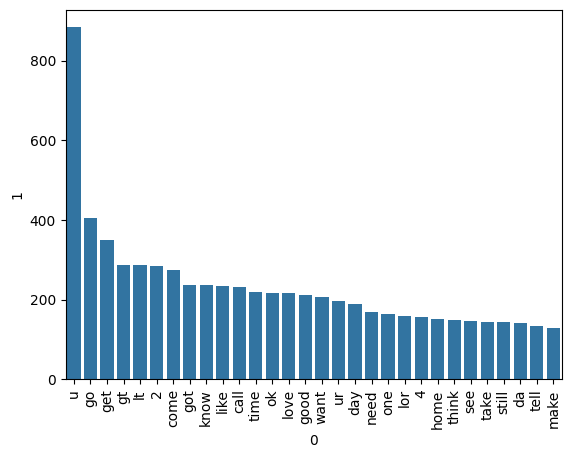

In [120]:
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)
sns.barplot(x=0, y=1, data=pd.DataFrame(Counter(ham_corpus).most_common(30)))
plt.xticks(rotation="vertical")
plt.show()

##**model building**##

In [121]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [122]:
X=cv.fit_transform(df["transformed_text"]).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6708))

In [123]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [125]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [126]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [127]:
gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
print("for gaussian")
print("cf:\n")
cf=confusion_matrix(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)
f1=f1_score(Y_test,Y_pred)
print(cf)
print(f"precision:{precision},recall:{recall},accuracy:{accuracy},f1:{f1}")

for gaussian
cf:

[[772 117]
 [ 19 126]]
precision:0.5185185185185185,recall:0.8689655172413793,accuracy:0.8684719535783365,f1:0.6494845360824743


In [128]:
mnb.fit(X_train,Y_train)
Y_pred=mnb.predict(X_test)
print("for multinomial")
print("cf:\n")
cf=confusion_matrix(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)
f1=f1_score(Y_test,Y_pred)
print(cf)
print(f"precision:{precision},recall:{recall},accuracy:{accuracy},f1:{f1}")

for multinomial
cf:

[[872  17]
 [ 10 135]]
precision:0.8881578947368421,recall:0.9310344827586207,accuracy:0.9738878143133463,f1:0.9090909090909091


In [129]:
bnb.fit(X_train,Y_train)
Y_pred=bnb.predict(X_test)
print("for bernoulli")
print("cf:\n")
cf=confusion_matrix(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)
f1=f1_score(Y_test,Y_pred)
print(cf)
print(f"precision:{precision},recall:{recall},accuracy:{accuracy},f1:{f1}")

for bernoulli
cf:

[[885   4]
 [ 31 114]]
precision:0.9661016949152542,recall:0.7862068965517242,accuracy:0.9661508704061895,f1:0.8669201520912547


In [130]:
##highest precision as data is imbalanced##

In [131]:
##different vectorization method##
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [132]:
X=tfidf.fit_transform(df["transformed_text"]).toarray()
X
y=df['target'].values
y

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
print("for gaussian")
print("cf:\n")
cf=confusion_matrix(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)
f1=f1_score(Y_test,Y_pred)
print(cf)
print(f"precision:{precision},recall:{recall},accuracy:{accuracy},f1:{f1}")

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
mnb.fit(X_train,Y_train)
Y_pred=mnb.predict(X_test)
print("for multinomial")
print("cf:\n")
cf=confusion_matrix(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)
f1=f1_score(Y_test,Y_pred)
print(cf)
print(f"precision:{precision},recall:{recall},accuracy:{accuracy},f1:{f1}")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

bnb.fit(X_train,Y_train)
Y_pred=bnb.predict(X_test)
print("for bernoulli")
print("cf:\n")
cf=confusion_matrix(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)
f1=f1_score(Y_test,Y_pred)
print(cf)
print(f"precision:{precision},recall:{recall},accuracy:{accuracy},f1:{f1}")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
for gaussian
cf:

[[772 117]
 [ 24 121]]
precision:0.5084033613445378,recall:0.8344827586206897,accuracy:0.8636363636363636,f1:0.6318537859007833
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
for multinomial
cf:

[[888   1]
 [ 39 106]]
precision:0.9906542056074766,recall:0.7310344827586207,accuracy:0.9613152804642167,f1:0.8412698412698413
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
for bernoulli
cf:

[[885   4]
 [ 31 114]]
precision:0.9661016949152542,recall:0.7862068965517242,accuracy:0.9661508704061895,f1:0.8669201520912547
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


##**we are using tfidf->mnb**##

In [133]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import LinearSVC
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
# from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier

# # All classifiers
# models = {
#     "GaussianNB": GaussianNB(),
#     "MultinomialNB": MultinomialNB(),
#     "BernoulliNB": BernoulliNB(),
#     "LogisticRegression": LogisticRegression(max_iter=1000),
#     "LinearSVC": LinearSVC(),
#     "RandomForest": RandomForestClassifier(),
#     "ExtraTrees": ExtraTreesClassifier(),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     "KNeighbors": KNeighborsClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "GradientBoosting": GradientBoostingClassifier(),
#     "BaggingClassifier": BaggingClassifier()
# }

# # Accuracy results
# accuracy_list = []

# # Evaluation loop
# for name, model in models.items():
#     print("x" * 80)
#     print(f"Training {name}")
#     model.fit(X_train, Y_train)
#     Y_pred = model.predict(X_test)

#     # Metrics
#     cf = confusion_matrix(Y_test, Y_pred)
#     precision = precision_score(Y_test, Y_pred)
#     recall = recall_score(Y_test, Y_pred)
#     accuracy = accuracy_score(Y_test, Y_pred)
#     f1 = f1_score(Y_test, Y_pred)

#     print("Confusion Matrix:\n", cf)
#     print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

#     accuracy_list.append((name, accuracy))

# # Plot results
# acc_df = pd.DataFrame(accuracy_list, columns=['Model', 'Accuracy'])

# plt.figure(figsize=(12, 6))
# sns.barplot(x='Model', y='Accuracy', data=acc_df.sort_values(by='Accuracy', ascending=False), palette="magma")
# plt.title("Accuracy Comparison of Classifiers")
# plt.ylim(0.8, 1.0)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training GaussianNB
Confusion Matrix:
 [[771 118]
 [ 24 121]]
Precision: 0.5063, Recall: 0.8345, Accuracy: 0.8627, F1 Score: 0.6302
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training MultinomialNB
Confusion Matrix:
 [[888   1]
 [ 27 118]]
Precision: 0.9916, Recall: 0.8138, Accuracy: 0.9729, F1 Score: 0.8939
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training BernoulliNB
Confusion Matrix:
 [[884   5]
 [ 23 122]]
Precision: 0.9606, Recall: 0.8414, Accuracy: 0.9729, F1 Score: 0.8971
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training LogisticRegression
Confusion Matrix:
 [[883   6]
 [ 37 108]]
Precision: 0.9474, Recall: 0.7448, Accuracy: 0.9584, F1 Score: 0.8340
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training LinearSVC
Confusion Matrix:
 [[886   3]
 [ 16 

C:\Users\SUNNY RAJ\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:55:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[884   5]
 [ 23 122]]
Precision: 0.9606, Recall: 0.8414, Accuracy: 0.9729, F1 Score: 0.8971
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training KNeighbors
Confusion Matrix:
 [[889   0]
 [ 96  49]]
Precision: 1.0000, Recall: 0.3379, Accuracy: 0.9072, F1 Score: 0.5052
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training AdaBoost
Confusion Matrix:
 [[869  20]
 [ 69  76]]
Precision: 0.7917, Recall: 0.5241, Accuracy: 0.9139, F1 Score: 0.6307
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training GradientBoosting
Confusion Matrix:
 [[883   6]
 [ 31 114]]
Precision: 0.9500, Recall: 0.7862, Accuracy: 0.9642, F1 Score: 0.8604
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training BaggingClassifier
Confusion Matrix:
 [[869  20]
 [ 27 118]]
Precision: 0.8551, Recall: 0.8138, Accuracy: 0.9545, F1 Score: 0.8339


C:\Users\SUNNY RAJ\AppData\Local\Temp\ipykernel_11424\204788312.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=acc_df ,palette="magma")
C:\Users\SUNNY RAJ\AppData\Local\Temp\ipykernel_11424\204788312.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='precision', data=pre_df.sort_values(by='precision', ascending=False), palette="magma")


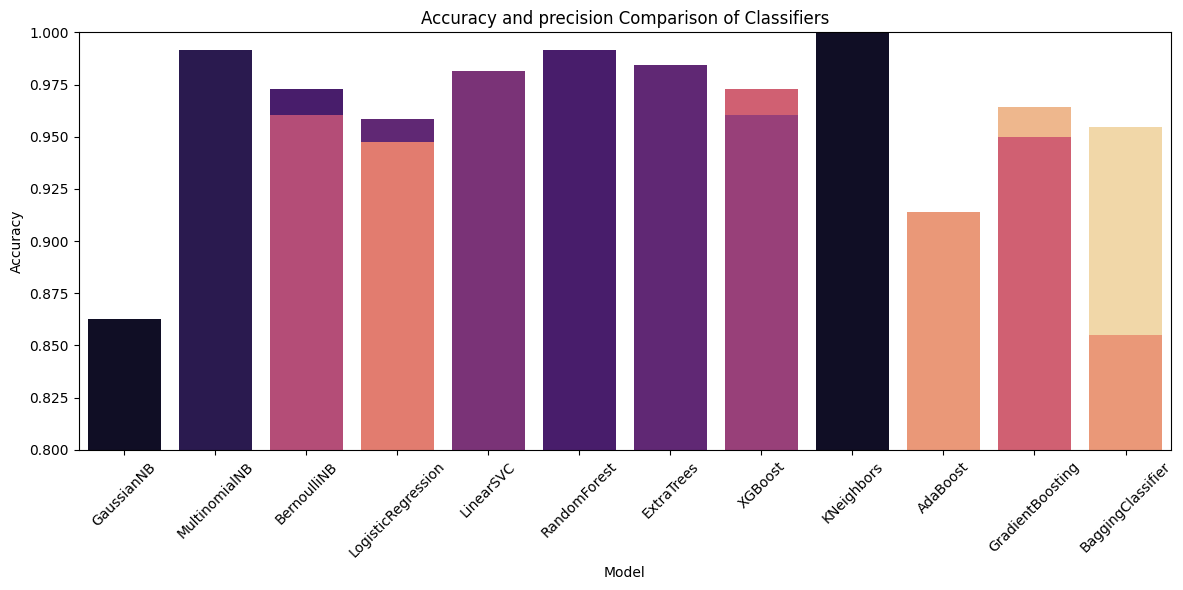

In [134]:
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df["transformed_text"]).toarray()
X
y=df['target'].values
y

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# All classifiers
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "LinearSVC": LinearSVC(),
    "RandomForest": RandomForestClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNeighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "BaggingClassifier": BaggingClassifier()
}

# Accuracy results
accuracy_list = []
precision_list=[]

# Evaluation loop
for name, model in models.items():
    print("x" * 80)
    print(f"Training {name}")
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Metrics
    cf = confusion_matrix(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    print("Confusion Matrix:\n", cf)
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

    accuracy_list.append((name, accuracy))
    precision_list.append((name,precision))
# Plot results
acc_df = pd.DataFrame(accuracy_list, columns=['Model', 'Accuracy'])
pre_df = pd.DataFrame(precision_list, columns=['Model', 'precision'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=acc_df ,palette="magma")
sns.barplot(x='Model', y='precision', data=pre_df.sort_values(by='precision', ascending=False), palette="magma")
plt.title("Accuracy and precision Comparison of Classifiers")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [144]:

import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))
pickle.dump(et,open("model1.pkl","wb"))

In [142]:
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df["transformed_text"]).toarray()
X
y=df['target'].values
y

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
mnb.fit(X_train,Y_train)
Y_pred=mnb.predict(X_test)
print("for multinomial")
print("cf:\n")
cf=confusion_matrix(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)
f1=f1_score(Y_test,Y_pred)
print(cf)
print(f"precision:{precision},recall:{recall},accuracy:{accuracy},f1:{f1}")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")


for multinomial
cf:

[[888   1]
 [ 27 118]]
precision:0.9915966386554622,recall:0.8137931034482758,accuracy:0.9729206963249516,f1:0.8939393939393939
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [137]:
X.shape

(5169, 3000)

In [143]:
et=ExtraTreesClassifier()
et.fit(X_train,Y_train)
Y_pred=et.predict(X_test)
print("for extra trees")
print("cf:\n")
cf=confusion_matrix(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)
f1=f1_score(Y_test,Y_pred)
print(cf)
print(f"precision:{precision},recall:{recall},accuracy:{accuracy},f1:{f1}")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")


for extra trees
cf:

[[887   2]
 [ 20 125]]
precision:0.984251968503937,recall:0.8620689655172413,accuracy:0.9787234042553191,f1:0.9191176470588235
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
